# Áp dụng PCA tính chỉ số VN30

BT1 - Xử lý đa chiều

#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### Preprocessing

In [2]:
frame = pd.read_csv('after_pp.csv')

In [3]:
frame['Ngày'] = pd.to_datetime(frame['Ngày'], format="%Y-%m-%d")
frame = frame.set_index('Ngày')

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-03-15 to 2022-03-14
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAS     250 non-null    float64
 1   VPB     250 non-null    float64
 2   BVH     250 non-null    float64
 3   HDB     250 non-null    float64
 4   TCB     250 non-null    float64
 5   SAB     250 non-null    float64
 6   VRE     250 non-null    float64
 7   PDR     250 non-null    float64
 8   ACB     250 non-null    float64
 9   HPG     250 non-null    float64
 10  VHM     250 non-null    float64
 11  BID     250 non-null    float64
 12  PLX     250 non-null    float64
 13  VJC     250 non-null    float64
 14  TPB     250 non-null    float64
 15  STB     250 non-null    float64
 16  SSI     250 non-null    float64
 17  MSN     250 non-null    float64
 18  MWG     250 non-null    float64
 19  CTG     250 non-null    float64
 20  POW     250 non-null    float64
 21  GVR     250 non-null

In [5]:
frame

,GAS,VPB,BVH,HDB,TCB,SAB,VRE,PDR,ACB,HPG,...,POW,GVR,PNJ,NVL,MBB,VIC,FPT,VCB,VNM,KDH
Ngày,,,,,,,,,,,,,,,,,,,,,
2021-03-15,91100.0,24889.2,60100.0,21320.0,40100.0,177000.0,34450.0,54529.2,26800.0,34254.3,...,13700.0,33848.795181,84100.0,46080.0,28900.0,94222.0,65930.9,74555.0,102200.0,28500.0
2021-03-16,90300.0,24639.2,59600.0,21440.0,39850.0,180600.0,34800.0,54610.6,26760.0,33959.7,...,13600.0,30300.000000,83500.0,45517.0,28650.0,93689.0,69809.2,74090.0,101000.0,28409.0
2021-03-17,92800.0,24778.0,59600.0,22000.0,40300.0,179200.0,34850.0,54691.9,26800.0,34107.0,...,13950.0,29450.000000,83600.0,45292.0,29000.0,93067.0,69636.8,74013.0,100500.0,28636.0
2021-03-18,91800.0,25472.5,60700.0,22000.0,41950.0,180600.0,35000.0,55343.0,27160.0,34328.0,...,13850.0,29700.000000,84900.0,45686.0,29200.0,94756.0,69809.2,75484.0,102500.0,29273.0
2021-03-19,90900.0,25111.4,61000.0,21720.0,42000.0,180000.0,34000.0,55750.0,27040.0,34733.1,...,13400.0,30700.000000,84600.0,44448.0,29200.0,96356.0,68775.0,72929.0,101700.0,29500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,120700.0,37000.0,58400.0,27350.0,49000.0,155600.0,32500.0,87100.0,32600.0,49450.0,...,17200.0,36750.000000,106000.0,76000.0,31000.0,77900.0,94800.0,81500.0,76100.0,52100.0
2022-03-09,122200.0,36850.0,56400.0,27000.0,49100.0,155000.0,31600.0,88000.0,32700.0,49850.0,...,16750.0,36300.000000,110500.0,76500.0,30750.0,78000.0,95500.0,83000.0,75100.0,51200.0
2022-03-10,118500.0,36750.0,57400.0,26950.0,49250.0,157000.0,32000.0,88100.0,32900.0,49150.0,...,16600.0,36000.000000,108300.0,77000.0,31050.0,79100.0,94600.0,83500.0,77100.0,51500.0


#### Through Eigenvector

##### Impute Return matrix

In [6]:
R = np.zeros((249,30))
for t in range(1,250):
    St = np.array(frame.iloc[t,:])
    St_1 = np.array(frame.iloc[t-1,:])
    R[t-1] = (St-St_1) / St_1

R = pd.DataFrame(R, columns=frame.columns)

In [7]:
R

,GAS,VPB,BVH,HDB,TCB,SAB,VRE,PDR,ACB,HPG,...,POW,GVR,PNJ,NVL,MBB,VIC,FPT,VCB,VNM,KDH
0,-0.008782,-0.010045,-0.008319,0.005629,-0.006234,0.020339,0.010160,0.001493,-0.001493,-0.008600,...,-0.007299,-0.104843,-0.007134,-0.012218,-0.008651,-0.005657,0.058824,-0.006237,-0.011742,-0.003193
1,0.027685,0.005633,0.000000,0.026119,0.011292,-0.007752,0.001437,0.001489,0.001495,0.004337,...,0.025735,-0.028053,0.001198,-0.004943,0.012216,-0.006639,-0.002470,-0.001039,-0.004950,0.007990
2,-0.010776,0.028029,0.018456,0.000000,0.040943,0.007812,0.004304,0.011905,0.013433,0.006480,...,-0.007168,0.008489,0.015550,0.008699,0.006897,0.018148,0.002476,0.019875,0.019900,0.022245
3,-0.009804,-0.014176,0.004942,-0.012727,0.001192,-0.003322,-0.028571,0.007354,-0.004418,0.011801,...,-0.032491,0.033670,-0.003534,-0.027098,0.000000,0.016885,-0.014815,-0.033848,-0.007805,0.007755
4,-0.004400,-0.006638,0.019672,-0.007366,-0.016667,-0.005556,0.017647,-0.014599,-0.011834,-0.008482,...,0.011194,-0.022801,-0.004728,0.022791,-0.018836,-0.010150,-0.013786,0.029714,-0.008850,-0.013864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.031300,-0.018568,-0.008489,-0.001825,-0.005076,0.006468,-0.012158,-0.026816,-0.019549,-0.032290,...,0.008798,0.020833,-0.018519,0.000000,-0.037267,-0.007643,0.010661,-0.040047,-0.009115,-0.031599
245,0.012428,-0.004054,-0.034247,-0.012797,0.002041,-0.003856,-0.027692,0.010333,0.003067,0.008089,...,-0.026163,-0.012245,0.042453,0.006579,-0.008065,0.001284,0.007384,0.018405,-0.013141,-0.017274
246,-0.030278,-0.002714,0.017730,-0.001852,0.003055,0.012903,0.012658,0.001136,0.006116,-0.014042,...,-0.008955,-0.008264,-0.019910,0.006536,0.009756,0.014103,-0.009424,0.006024,0.026631,0.005859
247,-0.047257,-0.009524,-0.006969,0.012987,-0.007107,-0.019108,-0.004687,-0.004540,-0.006079,-0.031536,...,-0.027108,-0.012500,-0.035088,0.002597,0.012882,-0.001264,-0.014799,0.003593,0.011673,-0.009709


In [8]:
mean = np.mean(R, axis= 0)
print("Mean ", mean.shape)
mean_data = R - mean
print("Data after subtracting mean ", mean_data.shape, "\n")

Mean  (30,)
Data after subtracting mean  (249, 30) 



In [9]:
cov = np.cov(mean_data.T)
print("Covariance matrix ", cov.shape, "\n")

Covariance matrix  (30, 30) 



In [10]:
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors ", eig_vec.shape)
print("Eigen values ", eig_val.shape, "\n")

Eigen vectors  (30, 30)
Eigen values  (30,) 



In [11]:
eig_val

array([4.66162432e-03, 1.26965214e-03, 8.92585163e-04, 6.55210830e-04,
       5.57924264e-04, 4.95530860e-04, 4.35540610e-04, 4.08140684e-04,
       3.67986745e-04, 3.38543324e-04, 3.14594810e-04, 3.03625304e-04,
       2.85486144e-04, 8.17468240e-05, 8.79765255e-05, 2.66412961e-04,
       2.57136711e-04, 1.01314741e-04, 2.33776031e-04, 2.25519955e-04,
       1.09044236e-04, 1.20456788e-04, 1.24758092e-04, 2.04128642e-04,
       1.38549512e-04, 1.48938182e-04, 1.89657002e-04, 1.82430661e-04,
       1.72858954e-04, 1.64031557e-04])

In [12]:
idx = np.argsort(eig_val, axis=0)[::-1]

In [13]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 18, 19,
       23, 26, 27, 28, 29, 25, 24, 22, 21, 20, 17, 14, 13])

In [14]:
idx = np.argsort(eig_val, axis=0)[::-1]
sorted_eig_vec = eig_vec[:, idx]
sorted_eig_vec

array([[-1.54434845e-01, -2.89373814e-01,  1.50889443e-01,
        -1.44395441e-01, -4.00465356e-01,  3.25119565e-01,
         2.77217668e-01, -8.02298724e-02, -1.65121129e-01,
        -6.36561029e-02, -1.05497506e-01, -1.58476133e-01,
         1.11247199e-01,  1.26308188e-01, -2.60605435e-02,
        -2.77305100e-01,  4.54035252e-02,  2.56352611e-01,
        -1.64080373e-01,  1.18777094e-01, -1.21369235e-01,
         7.67848854e-02, -5.82003828e-02, -2.76598452e-01,
        -2.25722472e-01, -3.41575223e-02, -1.37873635e-01,
        -2.12352324e-01, -1.86712514e-02, -8.20375011e-03],
       [-1.68393924e-01,  1.56386519e-01,  1.82570008e-02,
        -2.25960986e-02,  7.63283025e-02, -9.40407783e-02,
         5.67869773e-02, -1.50923565e-01,  6.25952182e-02,
         2.78075769e-01,  2.16568370e-01,  2.42419240e-01,
         4.05651396e-01, -4.06859592e-01, -3.62141097e-04,
        -7.47114450e-02,  1.31051895e-01, -2.43418483e-03,
        -1.98686399e-01,  3.57149807e-01,  2.06037327e-

In [15]:
pcI = sorted_eig_vec[:,0]
weights = abs(pcI)/sum(abs(pcI))

In [16]:
pcI

array([-0.15443485, -0.16839392, -0.14445798, -0.25400757, -0.24001926,
       -0.04611461, -0.19521138, -0.09753114, -0.20330981, -0.21496305,
       -0.16315531, -0.22146927, -0.12628641, -0.00738649, -0.27870687,
       -0.27773047, -0.30745646, -0.16462638, -0.14136889, -0.25103931,
       -0.19333637,  0.05220636, -0.13205233, -0.04984101, -0.29873471,
       -0.09667845, -0.13307454, -0.12603187, -0.06974752, -0.13896984])

##### Impute weight

In [17]:
weights

array([0.03120941, 0.03403037, 0.02919321, 0.05133185, 0.04850498,
       0.0093192 , 0.03944985, 0.01970986, 0.04108645, 0.04344143,
       0.03297171, 0.04475625, 0.02552095, 0.00149272, 0.05632328,
       0.05612596, 0.06213322, 0.033269  , 0.02856894, 0.050732  ,
       0.03907094, 0.01055027, 0.02668617, 0.01007226, 0.06037066,
       0.01953754, 0.02689275, 0.02546951, 0.01409513, 0.02808412])

In [18]:
frame.iloc[:,:].shape

(250, 30)

In [19]:
weights.shape

(30,)

In [20]:
price_stock = np.dot(frame.iloc[:,:], weights)
price_stock = pd.Series(price_stock)

price_stock = (weights*frame.iloc[:,:]).sum(1)
price_stock.shape

##### Final dataframe

In [21]:
final_df = price_stock.to_frame()
final_df.index = frame.index[0:]
final_df.columns = ['30']
final_df

,30
Ngày,
2021-03-15,44546.530711
2021-03-16,44451.812815
2021-03-17,44724.305871
2021-03-18,45281.943454
2021-03-19,44973.666813
...,...
2022-03-08,57327.226712
2022-03-09,57247.150946
2022-03-10,57043.295582


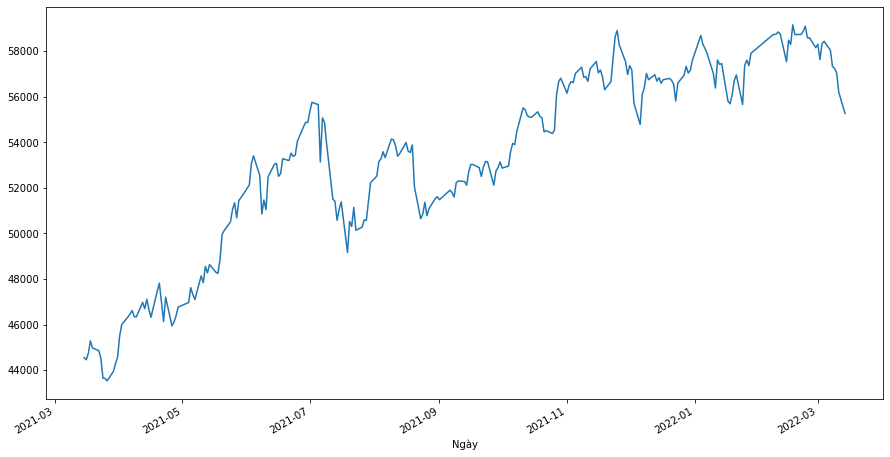

In [22]:
plt.figure(figsize=(15,8))

final_df['30'].plot();

In [23]:
import plotly.express as px

fig = px.line(final_df['30'], y="30", width=1000, height=500,);

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=0),
    paper_bgcolor="lightblue", 
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
)

fig.show()

## By PCA module

In [24]:
R = frame.apply(np.log).diff(1)
R

,GAS,VPB,BVH,HDB,TCB,SAB,VRE,PDR,ACB,HPG,...,POW,GVR,PNJ,NVL,MBB,VIC,FPT,VCB,VNM,KDH
Ngày,,,,,,,,,,,,,,,,,,,,,
2021-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-16,-0.008820,-0.010095,-0.008354,0.005613,-0.006254,0.020135,0.010108,0.001492,-0.001494,-0.008638,...,-0.007326,-0.110756,-0.007160,-0.012293,-0.008688,-0.005673,0.057159,-0.006257,-0.011811,-0.003198
2021-03-17,0.027309,0.005617,0.000000,0.025784,0.011229,-0.007782,0.001436,0.001488,0.001494,0.004328,...,0.025410,-0.028454,0.001197,-0.004955,0.012142,-0.006661,-0.002473,-0.001040,-0.004963,0.007959
2021-03-18,-0.010834,0.027643,0.018288,0.000000,0.040127,0.007782,0.004295,0.011835,0.013343,0.006459,...,-0.007194,0.008453,0.015431,0.008661,0.006873,0.017986,0.002473,0.019680,0.019705,0.022001
2021-03-19,-0.009852,-0.014278,0.004930,-0.012809,0.001191,-0.003328,-0.028988,0.007327,-0.004428,0.011732,...,-0.033031,0.033116,-0.003540,-0.027472,0.000000,0.016744,-0.014925,-0.034434,-0.007835,0.007725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,-0.031800,-0.018742,-0.008525,-0.001826,-0.005089,0.006447,-0.012233,-0.027182,-0.019742,-0.032822,...,0.008759,0.020619,-0.018692,0.000000,-0.037979,-0.007673,0.010605,-0.040871,-0.009156,-0.032109
2022-03-09,0.012351,-0.004062,-0.034847,-0.012880,0.002039,-0.003863,-0.028083,0.010280,0.003063,0.008056,...,-0.026511,-0.012320,0.041576,0.006557,-0.008097,0.001283,0.007357,0.018238,-0.013228,-0.017425
2022-03-10,-0.030746,-0.002717,0.017575,-0.001854,0.003050,0.012821,0.012579,0.001136,0.006098,-0.014142,...,-0.008996,-0.008299,-0.020110,0.006515,0.009709,0.014004,-0.009469,0.006006,0.026283,0.005842


In [25]:
pca = PCA(1).fit(R.fillna(0))
pc1 = pd.Series(index=R.columns, data=pca.components_[0])

In [26]:
pca.components_[0]

array([-0.15359646, -0.16885513, -0.14556133, -0.25145693, -0.23908081,
       -0.04595054, -0.19460076, -0.09680852, -0.20341404, -0.21354478,
       -0.16250059, -0.22152233, -0.1262103 , -0.00704531, -0.27721941,
       -0.27504606, -0.30500213, -0.16029812, -0.14036355, -0.25075049,
       -0.19358019,  0.04910001, -0.13065626, -0.04909466, -0.31492804,
       -0.09713082, -0.13274193, -0.12519929, -0.06896166, -0.13674091])

In [27]:
pc1

GAS   -0.153596
VPB   -0.168855
BVH   -0.145561
HDB   -0.251457
TCB   -0.239081
SAB   -0.045951
VRE   -0.194601
PDR   -0.096809
ACB   -0.203414
HPG   -0.213545
VHM   -0.162501
BID   -0.221522
PLX   -0.126210
VJC   -0.007045
TPB   -0.277219
STB   -0.275046
SSI   -0.305002
MSN   -0.160298
MWG   -0.140364
CTG   -0.250750
POW   -0.193580
GVR    0.049100
PNJ   -0.130656
NVL   -0.049095
MBB   -0.314928
VIC   -0.097131
FPT   -0.132742
VCB   -0.125199
VNM   -0.068962
KDH   -0.136741
dtype: float64

In [28]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*R).sum(1)
myrs.shape

(250,)

In [29]:
final_df = myrs.to_frame()
final_df.index = frame.index[0:]
final_df.columns = ['30']
final_df

,30
Ngày,
2021-03-15,0.000000
2021-03-16,-0.004176
2021-03-17,0.010000
2021-03-18,0.012941
2021-03-19,-0.006462
...,...
2022-03-08,-0.013106
2022-03-09,-0.003963
2022-03-10,0.000548


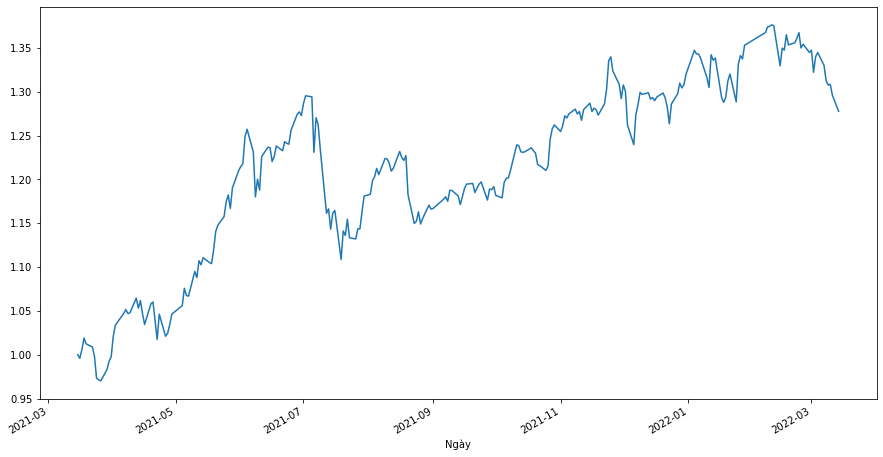

In [30]:
plt.figure(figsize=(15,8))

final_df['30'].cumsum().apply(np.exp).plot();

In [31]:
import plotly.express as px

fig = px.line(final_df['30'].cumsum().apply(np.exp), y="30", width=1000, height=500,);

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=0),
    paper_bgcolor="lightblue", 
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
)

fig.show()